# VGG Model 1

## Opening Remarks

These models are using the new and improved dataset. VGG is a Convolutional Neural network that is made up of 16 layers. These layers are a mixture of Conv2D/Pooling layers, Dense Layers and Drop out layers. VGG is considered one of the best computer vision models. I chose to only do 2 epochs at a time because it was fairly intensive on my computer.

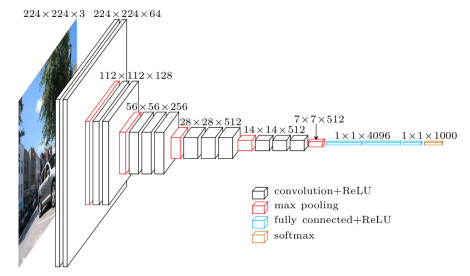

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras import models, layers, optimizers, regularizers
# from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


import cv2
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# using ImageDataGenerator to rescale all images 
train_datagen = ImageDataGenerator(rescale=1./256)
val_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)

In [10]:
train = tf.keras.utils.image_dataset_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/train')
test = tf.keras.utils.image_dataset_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/test')
val = tf.keras.utils.image_dataset_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/val')

Found 19862 files belonging to 2 classes.
Found 6208 files belonging to 2 classes.
Found 4965 files belonging to 2 classes.


In [24]:
train_generator = val_datagen.flow_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/train',
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        color_mode='rgb',
                                                        class_mode='binary')
validation_generator = val_datagen.flow_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/val',
                                                        target_size=(256, 256),
                                                        batch_size=10,
                                                        color_mode='rgb',
                                                        class_mode='binary')
test_generator = test_datagen.flow_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/test',
                                                  target_size=(256, 256),
                                                  batch_size=1,
                                                  color_mode='rgb',
                                                  class_mode='binary')

Found 19862 images belonging to 2 classes.
Found 4965 images belonging to 2 classes.
Found 6208 images belonging to 2 classes.


In [25]:
#getting images and labels for models
train_data, train_labels = next (train_generator)
test_data, test_labels = next (test_generator)
val_data, val_labels = next (validation_generator)

In [5]:
vgg = tf.keras.applications.vgg16.VGG16(
                                            include_top=False,     
                                            weights='imagenet',              
                                            input_shape=(256, 256, 3), )

In [6]:
model = tf.keras.Sequential([
vgg,
layers.Flatten(),
layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 14,747,457
Trainable params: 14,747,457
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=1,  # Number of epochs
                    validation_data=validation_generator,
                    workers = 16
                    )

100/100 [==============================] - 2312s 23s/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0517 - val_accuracy: 0.9831


In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
# Get precision, recall, and accuracy for test batch set
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [33]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.694915235042572, Recall: 0.9987345933914185, Accuracy: 0.7760953903198242


# Results of VGG

VGG:Precision: 0.9582728743553162, Recall: 0.835495114326477, Accuracy: 0.8977126479148865 (2 EPOCHS)
<br>VGG:Precision: Precision: 0.9752442836761475, Recall: 0.9471685886383057, Accuracy: 0.9608569741249084
(6 EPOCHS)
<br>VGG:Precision: Precision: 0.9539697170257568, Recall: 0.9769060611724854, Accuracy: 0.9642397165298462
(8 EPOCHS)
<br>VGG:Precision: Precision: 0.9901024103164673, Recall: 0.9177475571632385, Accuracy: 0.953447163105011
(10 EPOCHS)
<br> VGG_COMP: Precision: 0.9824896454811096, Recall: 0.9762733578681946, Accuracy: 0.9790592789649963 (7 EPOCHS)
<br> VGG (REVAMP): Precision: 0.6386809349060059, Recall: 0.9987345933914185, Accuracy: 0.7116623520851135 (7 EPOCHS)
<br> VGG (REVAMP): Precision: 0.7617433667182922, Recall: 0.9952546954154968, Accuracy: 0.8390786051750183 (10 EPOCHS)
<br>Precision: 0.7409582138061523, Recall: 0.9981018900871277, Accuracy: 0.8213595151901245 - 11 EPOCHS
<br>Precision: 0.7332867383956909, Recall: 0.9958873987197876, Accuracy: 0.813466489315033 - 12 EPOCHS
<br>Precision: 0.6932042837142944, Recall: 0.9971528053283691, Accuracy: 0.7738401889801025 - Computer 7

# Take Aways

It seems to be that after 10 epochs we have reached a point where the accuracy is going down and the recall is going up. The model created on my computer performed a bit better than the one done through Google CoLab. I believe that the model with an accuracy with 98% will be the one that I go with. There isn't a whole lot of tuning that can be done with this model.

# Pickler

In [ ]:
import joblib

# use the built-in open() function to open a file
output_file = open("deepfake7COMP2.pkl", "wb") # "wb" means "write as bytes"
# dump the variable's contents into the file
joblib.dump(model, output_file)
# close the file, ensuring nothing stays in the buffer
output_file.close()

# Load in Best Model

In [34]:
import joblib

In [30]:
from keras.models import load_model
model = load_model('tf_TransferLearning_8Classes_best_model.hdf5')

In [56]:
# use the built-in open() function again, this time to read
model_file = open("./my pickles/WORKING PICKLES/deepfake7GOOG.pkl", "rb") # "rb" means "read as bytes"
# load the variable's contents from the file into a variable
loaded_model = joblib.load(model_file)
# close the file
model_file.close()

# Create Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# Function to show confusion matrix 
##from sklearn
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
validation_generator = val_datagen.flow_from_directory('/Users/jordanmang/Flatiron/Flatiron_Labs/FaceForensics/Data_Split/val',
                                                        target_size=(256, 256),
                                                        batch_size=1000,
                                                        color_mode='rgb',
                                                        class_mode='binary')

Found 4965 images belonging to 2 classes.


In [47]:
val_data, val_labels = next (validation_generator)

In [48]:
y_pred = (loaded_model.predict(val_data) > 0.5).astype("int32")
cm = confusion_matrix(y_true= val_labels, y_pred=y_pred)  

32/32 [==============================] - 143s 4s/step


Confusion matrix, without normalization
[[487  10]
 [  3 500]]


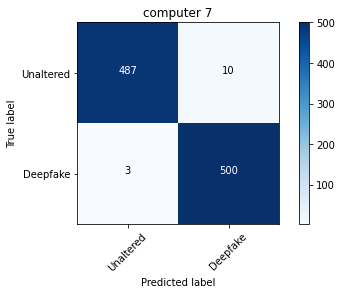

In [49]:
import itertools
cm_labels = ['Unaltered','Deepfake']
plot_confusion_matrix(cm=cm, classes=cm_labels, title='computer 7');

# Test Best Model (Deepfake)

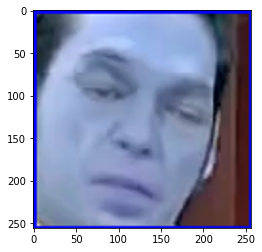

In [79]:
img = cv2.imread('0000 554.png')
plt.imshow(img)
plt.show()

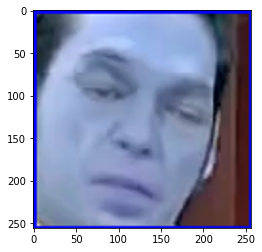

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 149ms/step


In [82]:
yhat

array([[0.05610159]], dtype=float32)

In [83]:
if yhat > 0.5: 
    print(f'The image is "Unaltered"')
else:
    print(f'This image is a deepfake')

This image is a deepfake
